# Sample Task

This task represents an illustrating subtask of the production project in a nuthell.

You will have one week to process it. 
You can decide how much time you want to invest, we think of one afternoon up to one day.

### The example

One part of a non-financial report compliant with the German DNK standard consists of a materiality analysis. 
For more information on DNK visit: https://www.deutscher-nachhaltigkeitskodex.de/ 
It is the leading german standard for non-financial reporting accepted by the goverment. 

As an example we want to perfom a __simplified materiality analysis__ on our sample customer, the Raiffeisenbank Holzkirchen-Otterfing eG.

For the internal analysis we want to find out on the companies most relevant topics based on its website commuication.

More explicitly we want to find out about the most used relevant words and represented it as a word cloud. As a second task we cluster the content appropriately, searching for interesting results.

### Task Instructions

Please use the website from the follwing example customer, crawl its text and perform necessary operations to identify 
which words are most commonly used excluding trivial data. 

As an extra task, please cluster the corpus for sections or sentences aiming to reveal priorities of the company.

We reccomend you to use frameworks to increase effectiveness. 

In [ ]:
# The sample customer in this case will be the Raiffeisenbank Holzkirchen-Otterfing eG because you can find nearly all relevant information online.

customer = {
    "company_name": "Raiffeisenbank Holzkirchen-Otterfing eG",
    "company_website": "https://www.rb-holzkirchen-otterfing.de",
    "company_classification": {
        "sector": "Banking",
        "corporate_form": "Genossenschaft",
        "brand": "Raiffeisenbank"
    }
}

## Happy Coding ;)

# Importing the required libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import os
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from gensim import models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from scipy.cluster import hierarchy

import warnings
warnings.filterwarnings("ignore")

os.chdir("D:\Workspace\Others\Spenoki\data")

cwd = os.getcwd()
%matplotlib inline

# Web Scraping -- Breadth method

**Methodology and Observations**

1. Scrape links only in the homepage https://www.rb-holzkirchen-otterfing.de 
2. When analysing homepage we see that there are 2 distinct groups. 
    - Wir sind da, wo Sie uns brauchen
    - Service-Leistungen
    
    So we are scraping the links pertaining to these alone and storing as files. 
    
    

In [2]:
base_url = "https://www.rb-holzkirchen-otterfing.de/"


req = requests.get(base_url).text
soup = BeautifulSoup(req, 'lxml')
linksInHomepage = []
linkTextInHomepage = []
for link in soup.find_all('a', href=True):
    linksInHomepage.append(str(link.get('href')))
    linkTextInHomepage.append(str(link.text))
    
    
    
linkGroup1 = linksInHomepage[28:33]
linkText1 = linkTextInHomepage[28:33] 

linkGroup2 = linksInHomepage[36:42]
linkText2 = linkTextInHomepage[36:42]

**Observation**

Its observed that the second link in that group is not referred back as a https link but instead is 

*'/content/f2156-0/internetneu_1/website/Wasunsauszeichnet/unsere-mitarbeiter---geschaeftsstellen/terminvereinbarung-online.html'*

So we manually change that for ease of access. 

In [3]:



linkGroup1[1] = 'https://www.rb-holzkirchen-otterfing.de/Wasunsauszeichnet/unsere-mitarbeiter---geschaeftsstellen/terminvereinbarung-online.html'

In [4]:
linkContent1 = []

for link in linkGroup1:
    req = requests.get(link).text
        
    soup = BeautifulSoup(req,'lxml')

    tmpText = soup.find("div", {"id": "wcbody"}).text
    ## Removing the last 108 lines as these are junk of alphanumeric. 
    tmpText = "\n".join(tmpText.split("\n")[:-108])
    ## Removing last 218 lines of each page as these are repeated in all pages. So it kind of is repetetive and will
    ##          have  a huge bias in the task and can possibly influence the output
    tmpText = "\n".join(tmpText.split("\n")[:-220])
    ## Removing the first 140 lines of each page as these are repeated in all pages and will have similar effect as
    ##          the above mentioned case
    tmpText = "\n".join(tmpText.split("\n")[140:])
    
    ## Cleaning the text content as it contains a lot of tags
    regex = re.compile(r'[\n\r\t]')
    tmpText = regex.sub(" ", tmpText)
    tmpText = tmpText.casefold()

    ## Tokenization and removal of stopwords which are in German
    tokens = word_tokenize(tmpText)
#     token = [word for word in tokens if word.isalpha()]
    
    stop_words = set(stopwords.words('german'))
    influentialwords = []
    for w in tokens:
        if w not in stop_words: 
            influentialwords.append(w)
    tmpText = " ".join(influentialwords)
#     tmpText = tmpText.casefold()
    
    linkContent1.append(tmpText)

In [5]:
linkContent2 = []

for link in linkGroup2:
    req = requests.get(link).text
        
    soup = BeautifulSoup(req,'lxml')

    tmpText = soup.find("div", {"id": "wcbody"}).text
    ## Removing the last 108 lines as these are junk of alphanumeric. 
    tmpText = "\n".join(tmpText.split("\n")[:-108])
    ## Removing last 218 lines of each page as these are repeated in all pages. So it kind of is repetetive and will
    ##          have  a huge bias in the task and can possibly influence the output
    tmpText = "\n".join(tmpText.split("\n")[:-220])
    ## Removing the first 140 lines of each page as these are repeated in all pages and will have similar effect as
    ##          the above mentioned case
    tmpText = "\n".join(tmpText.split("\n")[140:])
    
    regex = re.compile(r'[\n\r\t]')
    tmpText = regex.sub(" ", tmpText)
    tmpText = tmpText.casefold()

    ## Tokenization and removal of stopwords which are in German
    tokens = word_tokenize(tmpText)
#     token = [word for word in tokens if word.isalpha()]
    
    stop_words = set(stopwords.words('german'))
    influentialwords = []
    for w in tokens:
        if w not in stop_words: 
            influentialwords.append(w)
    tmpText = " ".join(influentialwords)
#     tmpText = tmpText.casefold()
    
    linkContent2.append(tmpText)

## Task 1

**Most Commonly used Words as asked by making a Word Cloud**

(-0.5, 399.5, 199.5, -0.5)

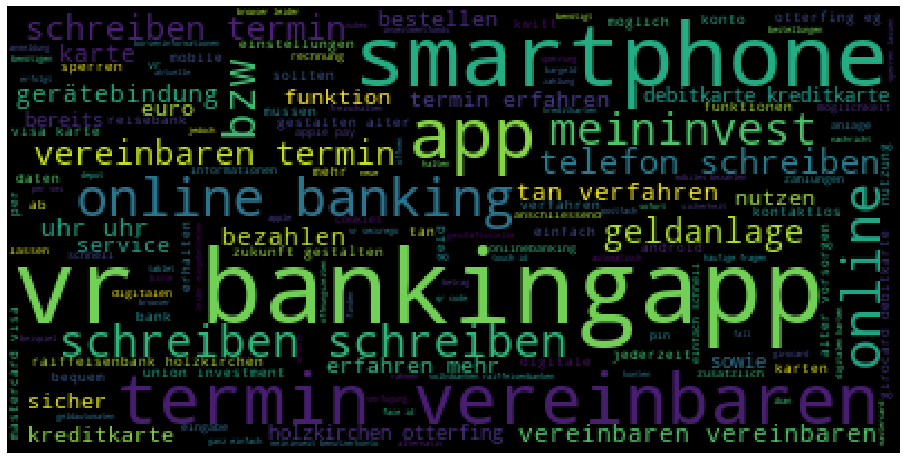

In [6]:
plt.figure(figsize = (16,10))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(linkContent1+linkContent2))
plt.imshow(wc)
plt.axis('off')

**Observations**

1. Based on the obtained word cloud, we can say that the bank is more focussed on using and promoting the banking app - the VR bannking app. 
2. The bank is also focussed on making the customer book an appointment in order to meet the officials. This is a professional banking way. 
3. The bank also has a "Telephone Schreiber" - a phone clerk to assist the customers who reach out to them through phone calls.
4. The bank is also focussed on investment of an individual and its seen using the keyword "MeinInvest". This helps a customer track his/her investment details. 
5. Also the bank has lots of options which gives the customer the freedom to write to the bank. That's evident in the keywords



**Recommendations**

1. As we see that the banking is more focussed towards online banking or phone banking, I would suggest the bank to possibly provide information on how to fraudulent happenings through online banking or phone banking. These information can be provided in the websites which provide information on phone banking. These information would provide confidence to people who aren't much acquainted in using phone or online banking. 
2. I would suggest the bank to include some top customer's experiences with the banking app so that other customers will get confidence to use the app. 



## Task 2

**Cluster the corpus for sections or sentences aiming to reveal priorities of the company.**

### Training on Corpus 1

In [7]:
try:
    # Train doc2vec model
    print("Training Doc2Vec model....")
    doc2vec_model = models.Doc2Vec(size=300, window=5, min_count=3, workers=200,alpha=0.025, min_alpha=0.025,epochs=10)

    tag_data =  [models.doc2vec.TaggedDocument(d, [i]) for i, d in enumerate(linkContent1)]


    doc2vec_model.build_vocab(tag_data)
    doc2vec_model.train(tag_data,total_examples=len(tag_data), epochs=10)
    textVect1 = doc2vec_model.docvecs.doctag_syn0
    print("Model Completed training!")

except Exception as e:
    print(e)

Training Doc2Vec model....
Model Completed training!


#### Kmeans clustering

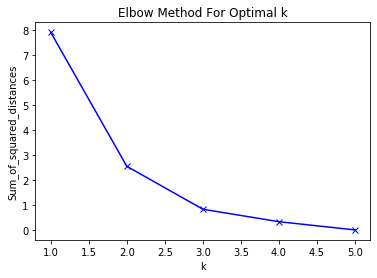

In [8]:
sum_of_squared_distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(textVect1)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=2, max_iter=500, algorithm = 'auto', init='k-means++')
kmeans = kmeans.fit(textVect1)
kmeansLabels1 = kmeans.labels_.tolist()



**Evaluation**

In [10]:
metrics.silhouette_score(textVect1, labels=kmeans.predict(textVect1))


0.414476

**Visualization**

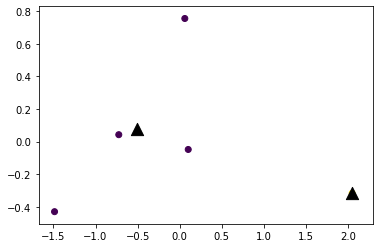

In [11]:
pca = PCA(n_components=2).fit(textVect1)
datapoint = pca.transform(textVect1)

# label_colour = [“#FFFF00”, “#008000”, “#0000FF”, “#800080”]
# color = [label_colour[i] for i in kmeansLabels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c=kmeans.predict(textVect1))
centroids = kmeans.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

**Observations**

1. It can be seen that links pertaining to banking service is clustered in a different cluster as compared to the other links. This can be manually verified that clustering of these particular corpus is being done properly. 

### Training on Corpus 2

In [12]:
try:
    # Train doc2vec model
    print("Training Doc2Vec model....")
    doc2vec_model = models.Doc2Vec(size=300, window=5, min_count=10, workers=200,alpha=0.025, min_alpha=0.025,epochs=20)

    tag_data =  [models.doc2vec.TaggedDocument(d, [i]) for i, d in enumerate(linkContent2)]


    doc2vec_model.build_vocab(tag_data)
    doc2vec_model.train(tag_data,total_examples=len(tag_data), epochs=20)
    textVect2 = doc2vec_model.docvecs.doctag_syn0
    print("Model Completed training!")

except Exception as e:
    print(e)

Training Doc2Vec model....
Model Completed training!


#### Kmeans clustering

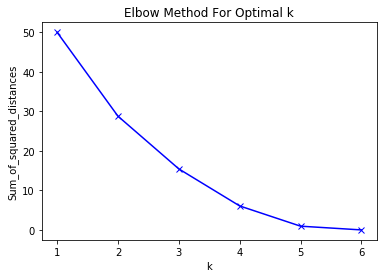

In [13]:
sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(textVect2)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, max_iter=500, algorithm = 'auto', init='k-means++')
kmeans = kmeans.fit(textVect2)
kmeansLabels2 = kmeans.labels_.tolist()

**Evaluation**

In [15]:
metrics.silhouette_score(textVect2, labels=kmeans.predict(textVect2))


0.26448652

**Visualization**

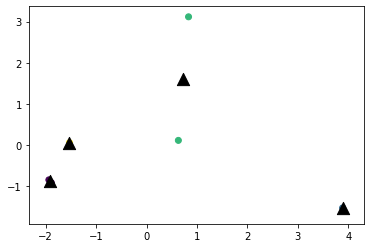

In [16]:
pca = PCA(n_components=2).fit(textVect2)
datapoint = pca.transform(textVect2)

# label_colour = [“#FFFF00”, “#008000”, “#0000FF”, “#800080”]
# color = [label_colour[i] for i in kmeansLabels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c=kmeans.predict(textVect2))
centroids = kmeans.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

### Training on Corpus 1 and Corpus 2 together

In [17]:
linkContent = linkContent1+linkContent2
try:
    # Train doc2vec model
    print("Training Doc2Vec model....")
    doc2vec_model = models.Doc2Vec(size=300, window=5, min_count=10, workers=200,alpha=0.025, min_alpha=0.025,epochs=20)

    tag_data =  [models.doc2vec.TaggedDocument(d, [i]) for i, d in enumerate(linkContent)]


    doc2vec_model.build_vocab(tag_data)
    doc2vec_model.train(tag_data,total_examples=len(tag_data), epochs=20)
    textVect = doc2vec_model.docvecs.doctag_syn0
    print("Model Completed training!")

except Exception as e:
    print(e)

Training Doc2Vec model....
Model Completed training!


#### K-Means Clustering

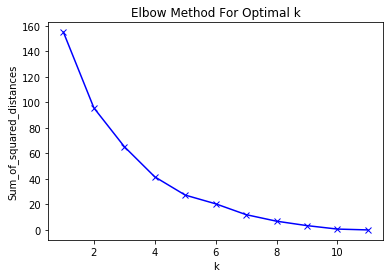

In [18]:
sum_of_squared_distances = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(textVect)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=6, max_iter=500, algorithm = 'auto', init='k-means++')
kmeans = kmeans.fit(textVect)
kmeansLabels = kmeans.labels_.tolist()

**Evaluation**

In [20]:
metrics.silhouette_score(textVect, labels=kmeans.predict(textVect))


0.19816837

**Visualization** - kmeans using scatter plot

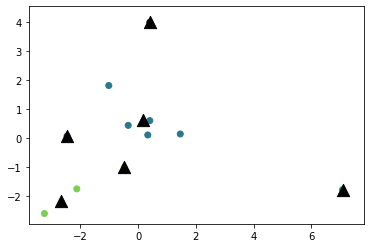

In [21]:
pca = PCA(n_components=2).fit(textVect)
datapoint = pca.transform(textVect)

# label_colour = [“#FFFF00”, “#008000”, “#0000FF”, “#800080”]
# color = [label_colour[i] for i in kmeansLabels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c=kmeans.predict(textVect))
centroids = kmeans.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

**Visualization** -- TSNE plots

**2 D plot**

In [22]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(textVect)


corpus12Df = pd.DataFrame()
corpus12Df['text'] = linkContent
corpus12Df['cluster'] = kmeansLabels
corpus12Df['2d-one'] = tsne_results[:,0]
corpus12Df['2d-two'] = tsne_results[:,1]

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 11 samples in 0.000s...
[t-SNE] Computed neighbors for 11 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 11 / 11
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.509796
[t-SNE] KL divergence after 300 iterations: 0.314218


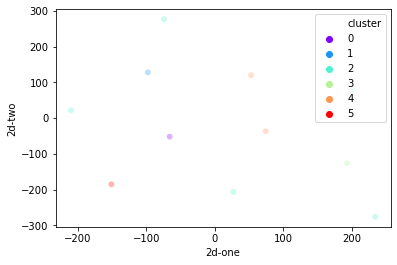

In [23]:
sns.scatterplot(x="2d-one", y="2d-two",hue="cluster",palette='rainbow',data=corpus12Df,legend="full",alpha=0.3)

**3D plot**

In [24]:
tsne3d = TSNE(n_components=3, random_state=0)
tsne_results_3d = tsne3d.fit_transform(textVect)

corpus12Df_3d = pd.DataFrame()
corpus12Df_3d['text'] = linkContent
corpus12Df_3d['cluster'] = kmeansLabels
corpus12Df_3d['3d-one'] = tsne_results_3d[:,0]
corpus12Df_3d['3d-one'] = tsne_results_3d[:,1]
corpus12Df_3d['3d-three'] = tsne_results_3d[:,2]


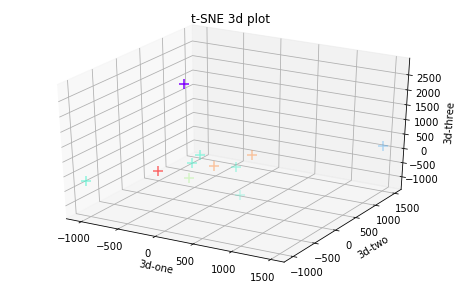

In [25]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(corpus12Df_3d['3d-one'], corpus12Df_3d['3d-one'], corpus12Df_3d['3d-three'], c= corpus12Df_3d['cluster'],cmap='rainbow', s = 100, marker='+')

ax.set_xlabel('3d-one')
ax.set_ylabel('3d-two')
ax.set_zlabel('3d-three')
plt.title("t-SNE 3d plot")
plt.axis('tight')
plt.show()

**Plotting word cloud for each cluster**

In [26]:
scrapedTextbreadth3d_0 = corpus12Df_3d.loc[corpus12Df_3d['cluster'] == 0].text.values
scrapedTextbreadth3d_1 = corpus12Df_3d.loc[corpus12Df_3d['cluster'] == 1].text.values
scrapedTextbreadth3d_2 = corpus12Df_3d.loc[corpus12Df_3d['cluster'] == 2].text.values
scrapedTextbreadth3d_3 = corpus12Df_3d.loc[corpus12Df_3d['cluster'] == 3].text.values
scrapedTextbreadth3d_4 = corpus12Df_3d.loc[corpus12Df_3d['cluster'] == 4].text.values
scrapedTextbreadth3d_5 = corpus12Df_3d.loc[corpus12Df_3d['cluster'] == 5].text.values

**Wordcloud for cluster 0**

(-0.5, 399.5, 199.5, -0.5)

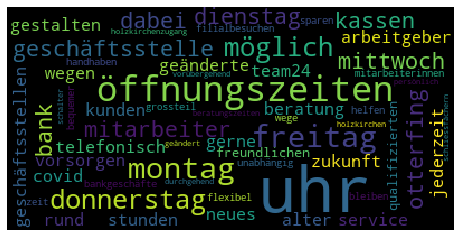

In [27]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadth3d_0))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 1**

(-0.5, 399.5, 199.5, -0.5)

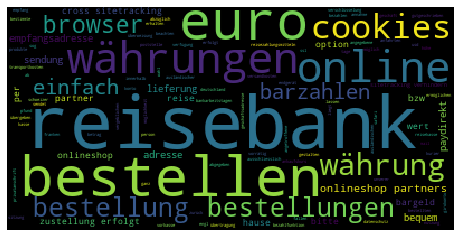

In [28]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadth3d_1))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 2**

(-0.5, 399.5, 199.5, -0.5)

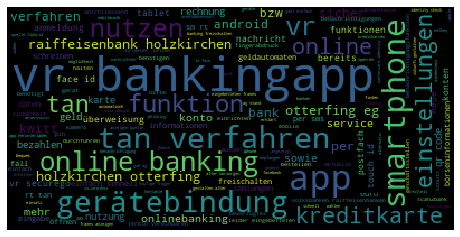

In [29]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadth3d_2))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 3**

(-0.5, 399.5, 199.5, -0.5)

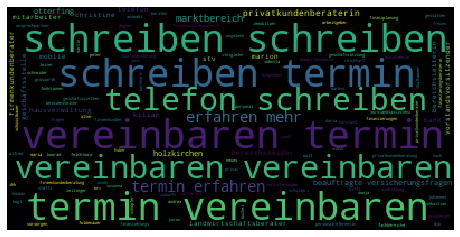

In [30]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadth3d_3))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 4**

(-0.5, 399.5, 199.5, -0.5)

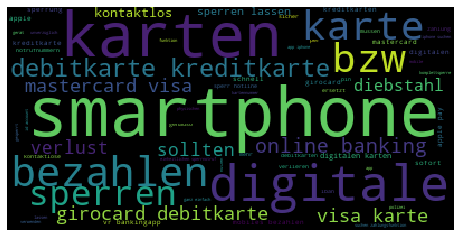

In [31]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadth3d_4))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 5**

(-0.5, 399.5, 199.5, -0.5)

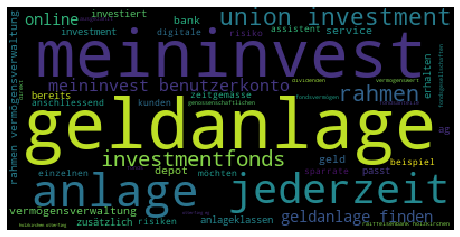

In [32]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadth3d_5))
plt.imshow(wc)
plt.axis('off')

**Observations from clustering approach for Kmeans cluster for corpus 1 and 2 together which was obtained using Breadth method**

So based on the approach followed there were 6 clusters which were produced with each one having a separate focus. 
1. Cluster 0 had dealt with the opening and closing of banking hours in different days of week and also about coworkers.
2. Cluster 1 focussed on euro, different currencies, travel banks and ordering currencies. 
3. Cluster 2 focussed solely on the VR banking app which the bank was trying to promote as observed from the Wordclous in Task 1
4. Cluster 3 had its attention towards the appointments and writing the bank for appointments. 
5. Cluster 4 focussed on smartphone, cards and payment modes. 
6. Cluster 5 dealt with a customer's investment and different types of investment. 


So based on the results we got we see very low similarity amongst the clusters and each cluster had few things which were peculiar to those clusters alone. So decent patterns were found. 

#### HAC - with euclidean distance

To find the optimal clusters, we use the dendogram approach to select the n_cluster value. 

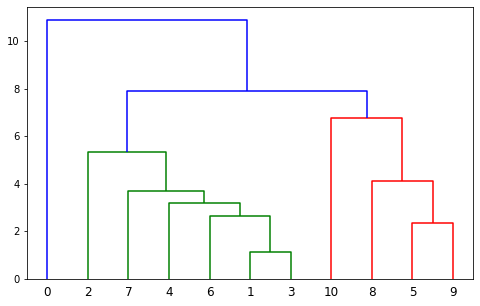

In [33]:
Z = hierarchy.linkage(textVect, 'ward')
plt.figure(figsize=(8,5))
dn = hierarchy.dendrogram(Z)
# hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
# hierarchy.set_link_color_palette(None)
plt.show()

**Observation**

We observe that there can be 3 distinct clusters possible

In [55]:
hac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hac = hac.fit(textVect)
hacLabels12 = hac.labels_.tolist()

**Visualization**

**2D plot**

In [56]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(textVect)


corpus12Df_2d_hac = pd.DataFrame()
corpus12Df_2d_hac['text'] = linkContent
corpus12Df_2d_hac['cluster'] = hacLabels12
corpus12Df_2d_hac['2d-one'] = tsne_results[:,0]
corpus12Df_2d_hac['2d-two'] = tsne_results[:,1]

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 11 samples in 0.000s...
[t-SNE] Computed neighbors for 11 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 11 / 11
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.142963
[t-SNE] KL divergence after 300 iterations: 0.288471


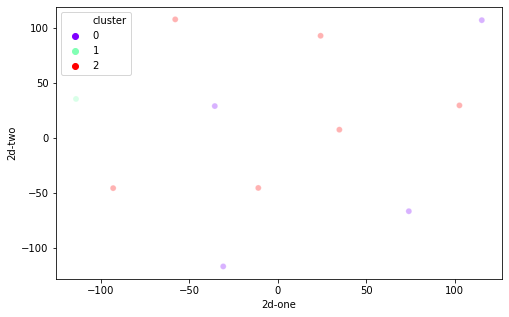

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="2d-one", y="2d-two",hue="cluster",palette='rainbow',data=corpus12Df_2d_hac,legend="full",alpha=0.3)

**3D plot**

In [58]:
tsne3d = TSNE(n_components=3, random_state=0)
tsne_results_3d = tsne3d.fit_transform(textVect)

corpus12Df_3d_hac = pd.DataFrame()
corpus12Df_3d_hac['text'] = linkContent
corpus12Df_3d_hac['cluster'] = hacLabels12
corpus12Df_3d_hac['3d-one'] = tsne_results_3d[:,0]
corpus12Df_3d_hac['3d-one'] = tsne_results_3d[:,1]
corpus12Df_3d_hac['3d-three'] = tsne_results_3d[:,2]

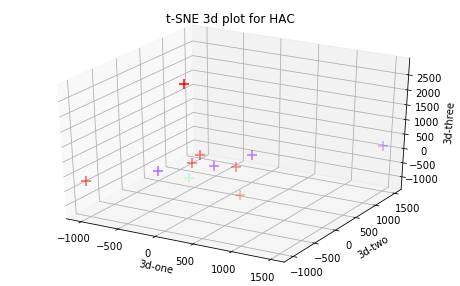

In [59]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(corpus12Df_3d_hac['3d-one'], corpus12Df_3d_hac['3d-one'], corpus12Df_3d_hac['3d-three'], c= corpus12Df_3d_hac['cluster'],cmap='rainbow', s = 100, marker='+')

ax.set_xlabel('3d-one')
ax.set_ylabel('3d-two')
ax.set_zlabel('3d-three')
plt.title("t-SNE 3d plot for HAC")
plt.axis('tight')
plt.show()

**Plotting word cloud for each cluster**

In [39]:
scrapedTextbreadthHAC3d_0 = corpus12Df_3d_hac.loc[corpus12Df_3d_hac['cluster'] == 0].text.values
scrapedTextbreadthHAC3d_1 = corpus12Df_3d_hac.loc[corpus12Df_3d_hac['cluster'] == 1].text.values
scrapedTextbreadthHAC3d_2 = corpus12Df_3d_hac.loc[corpus12Df_3d_hac['cluster'] == 2].text.values

**Wordcloud for cluster 0**

(-0.5, 399.5, 199.5, -0.5)

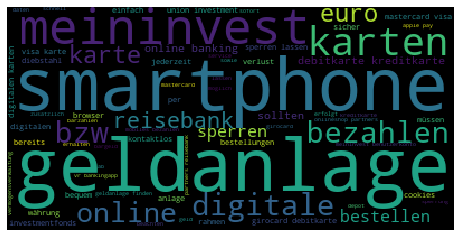

In [40]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadthHAC3d_0))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 1**

(-0.5, 399.5, 199.5, -0.5)

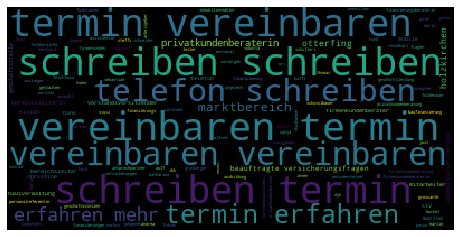

In [41]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadthHAC3d_1))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 2**

(-0.5, 399.5, 199.5, -0.5)

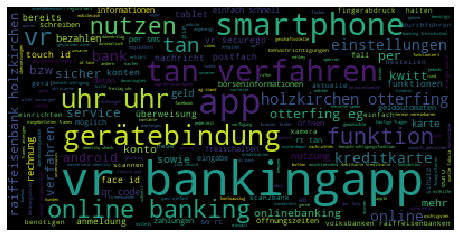

In [42]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadthHAC3d_2))
plt.imshow(wc)
plt.axis('off')

**Observations from clustering approach for HAC for corpus 1 and 2 together which was obtained using Breadth method**

So based on the approach followed there were 3 clusters which were produced with each one having a seperate focus. 
1. Cluster 0 focussed solely on the online banking, travel banking, cards and digital banking. 
2. Cluster 1 focussed on customer support through appointments and writing to the bank for help. 
3. Cluster 2 focussed on investments, Banking apps and its related words.  


So based on the results we got we see very low similarity amongst the clusters and each cluster had few things which were peculiar to those clusters alone. So decent patterns were found. 


#### HAC - with cosine similarity as distance metric

To find the optimal clusters, we use the dendogram approach to select the n_cluster value. 

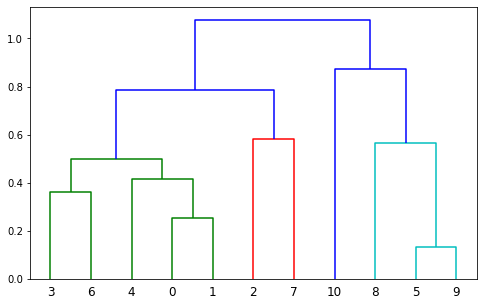

In [60]:
Z = hierarchy.linkage(textVect, method='average', metric='cosine')
plt.figure(figsize=(8,5))
dn = hierarchy.dendrogram(Z)
# hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
# hierarchy.set_link_color_palette(None)
plt.show()

**Observation**

We observe that there can be 3 distinct clusters possible

In [61]:
hac = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='average')
hac = hac.fit(textVect)
hacLabels12 = hac.labels_.tolist()

**Visualization**

**2D plot**

In [62]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(textVect)


corpus12Df_2d_hac = pd.DataFrame()
corpus12Df_2d_hac['text'] = linkContent
corpus12Df_2d_hac['cluster'] = hacLabels12
corpus12Df_2d_hac['2d-one'] = tsne_results[:,0]
corpus12Df_2d_hac['2d-two'] = tsne_results[:,1]

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 11 samples in 0.000s...
[t-SNE] Computed neighbors for 11 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 11 / 11
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.088295
[t-SNE] KL divergence after 300 iterations: 0.451496


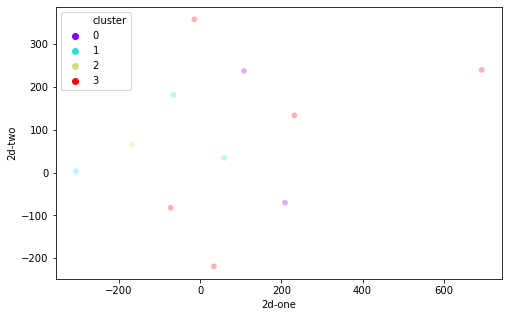

In [63]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="2d-one", y="2d-two",hue="cluster",palette='rainbow',data=corpus12Df_2d_hac,legend="full",alpha=0.3)

**3D plot**

In [64]:
tsne3d = TSNE(n_components=3, random_state=0)
tsne_results_3d = tsne3d.fit_transform(textVect)

corpus12Df_3d_hac_cosine = pd.DataFrame()
corpus12Df_3d_hac_cosine['text'] = linkContent
corpus12Df_3d_hac_cosine['cluster'] = hacLabels12
corpus12Df_3d_hac_cosine['3d-one'] = tsne_results_3d[:,0]
corpus12Df_3d_hac_cosine['3d-one'] = tsne_results_3d[:,1]
corpus12Df_3d_hac_cosine['3d-three'] = tsne_results_3d[:,2]

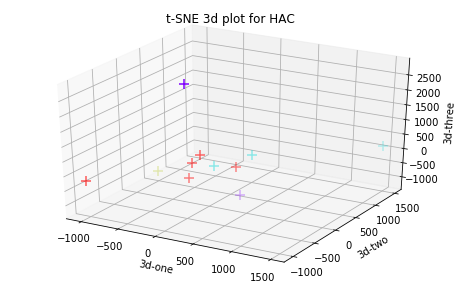

In [65]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(corpus12Df_3d_hac_cosine['3d-one'], corpus12Df_3d_hac_cosine['3d-one'], corpus12Df_3d_hac_cosine['3d-three'], c= corpus12Df_3d_hac_cosine['cluster'],cmap='rainbow', s = 100, marker='+')

ax.set_xlabel('3d-one')
ax.set_ylabel('3d-two')
ax.set_zlabel('3d-three')
plt.title("t-SNE 3d plot for HAC")
plt.axis('tight')
plt.show()

**Plotting word cloud for each cluster**

In [66]:
scrapedTextbreadthHAC3dcos_0 = corpus12Df_3d_hac_cosine.loc[corpus12Df_3d_hac_cosine['cluster'] == 0].text.values
scrapedTextbreadthHAC3dcos_1 = corpus12Df_3d_hac_cosine.loc[corpus12Df_3d_hac_cosine['cluster'] == 1].text.values
scrapedTextbreadthHAC3dcos_2 = corpus12Df_3d_hac_cosine.loc[corpus12Df_3d_hac_cosine['cluster'] == 2].text.values
scrapedTextbreadthHAC3dcos_3 = corpus12Df_3d_hac_cosine.loc[corpus12Df_3d_hac_cosine['cluster'] == 3].text.values

**Wordcloud for cluster 0**

(-0.5, 399.5, 199.5, -0.5)

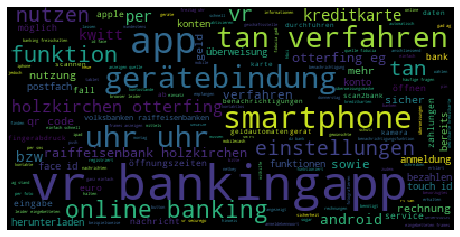

In [68]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadthHAC3dcos_0))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 1**

(-0.5, 399.5, 199.5, -0.5)

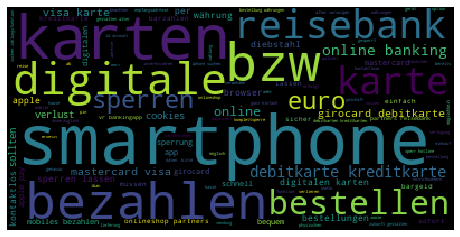

In [69]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadthHAC3dcos_1))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 2**

(-0.5, 399.5, 199.5, -0.5)

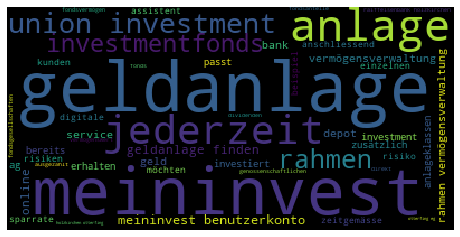

In [70]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadthHAC3dcos_2))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 3**

(-0.5, 399.5, 199.5, -0.5)

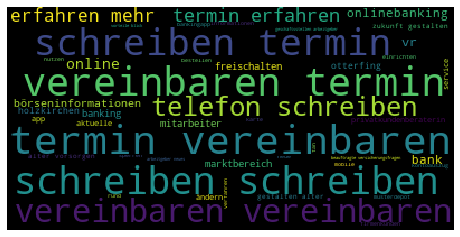

In [71]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextbreadthHAC3dcos_3))
plt.imshow(wc)
plt.axis('off')

**Observations from clustering approach for HAC using cosine similarity for corpus 1 and 2 together which was obtained using Breadth method**

So based on the approach followed there were 3 clusters which were produced with each one having a seperate focus. 
1. Cluster 0 focussed on smartphone,online banking,  Banking apps and its related words.  
2. Cluster 1 focussed solely on the online banking, travel banking, cards and digital banking.
3. Cluster 2 focussed on investments and its related words.
4. Cluster 3 focussed on customer support through appointments and writing to the bank for help. 


So we can infer that some amount of similarity is existing between cluster 0 and cluster 1. Probably this correlation was not seen in HAC done through euclidean distance method. Since here another extra cluster is formed a small amount of correlation is observed.  


## Conclustion from Breadth method

We can conclude that clusters with high inter cluster dissimilarity were observed.  

So this approach provided us good patterns for each separate cluster. 

# Web Scraping -- Depth method

**Methodolgy and Observations**

1. Hyperlinks starting with https://www.rb-holzkirchen-otterfing.de were only considered. Other hyperlinks were removed.
2. As a website can have too many links, the number of hyperlinks restricted is 200. It can be changed based on the user's preference. 
3. The webpages are crawled for each hyperlink and then those which contain the _content_ alone are taken. Meaning those which redirect to a document are ignored. 
4. In these documents, the last 100+ lines are of some encoding, so they are cleaned and written. 
5. When observed it is seen that every document/webpage has a standard set of keywords. Eg. those which are present in the top of the webpage and bottom of webpage. These can be removed. These can't be treated as stopwords as some words in these may be very much important for our analysis as they might be present in actual content of the webpage. 

In [72]:
## initialise the base_url as the website we are scraping
base_url = "https://www.rb-holzkirchen-otterfing.de/"


req = requests.get(base_url).text


soup = BeautifulSoup(req, 'lxml')
data = []
links = []
links.append(base_url)

## the limit is set so that we retrieve that many links. 
limit = 199


# remove duplicates and URL string
def remove_duplicates(linksToFunction): 
    for link in linksToFunction:
        match = re.search("(?P<url>https?://[^\s]+)", link)
        if match is not None:
            links.append((match.group("url")))


for link in soup.find_all('a', href=True):
    data.append(str(link.get('href')))
flag = True
remove_duplicates(data)

## To make sure there aren't any duplicates. 
links = list(set(links))

## To ensure that links are of the website of base_url and no other website is being traversed. 
links = [x for x in links if base_url in x]

## To retrieve all the hyperlinks and sub-hyperlinks of the website.
while flag:
    try:
        for link in links:
            for sublink in soup.find_all('a', href=True):
                tempLink = []
                source_code = requests.get(link)
                soup = BeautifulSoup(source_code.content, 'lxml')
                tempLink.append(str(sublink.get('href')))
                remove_duplicates(tempLink)
                
                links = list(set(links))
                links = [x for x in links if base_url in x]

                
                if len(links) > limit: # set limitation to number of URLs
                    break
            if len(links) > limit:
                break
        if len(links) > limit:
            break
    except Exception as e:
        print(e)
        if len(links) > limit:
            break
        


In [73]:
## initialising random file names and storing them in increment way. 
# filename = 1
scrapedText = []
linksRetrieved = []


for link in links:
    
    try:
        
#        print(link)
        req = requests.get(link).text
        
        soup = BeautifulSoup(req,'html.parser')
        
        tmpText = soup.find("div", {"id": "wcbody"}).text
        ## Removing the last 108 lines as these are junk of alphanumeric. 
        tmpText = "\n".join(tmpText.split("\n")[:-108])
        ## Removing last 218 lines of each page as these are repeated in all pages. So it kind of is repetetive and will
        ##          have  a huge bias in the task and can possibly influence the output
        tmpText = "\n".join(tmpText.split("\n")[:-220])
        ## Removing the first 140 lines of each page as these are repeated in all pages and will have similar effect as
        ##          the above mentioned case
        tmpText = "\n".join(tmpText.split("\n")[140:])
        
        ## Cleaning the text content as it contains a lot of tags
        regex = re.compile(r'[\n\r\t]')
        tmpText = regex.sub(" ", tmpText)
        
        tmpText = tmpText.casefold()

        ## Tokenization and removal of stopwords which are in German
        tokens = word_tokenize(tmpText)
#         token = [word for word in tokens if word.isalpha()]

        stop_words = set(stopwords.words('german'))
        influentialwords = []
        for w in tokens:
            if w not in stop_words: 
                influentialwords.append(w)
        tmpText = " ".join(influentialwords)

        
        scrapedText.append(tmpText)
        linksRetrieved.append(link)
#         textfile = open(str(filename)+'.txt', 'w', encoding='utf-8')
#         textfile.write(tmpText)
#         textfile.close()
#         filename = filename+1
    except Exception as e:
        print(e)
        
        
print(len(scrapedText))

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
192


## Task 1

(-0.5, 399.5, 199.5, -0.5)

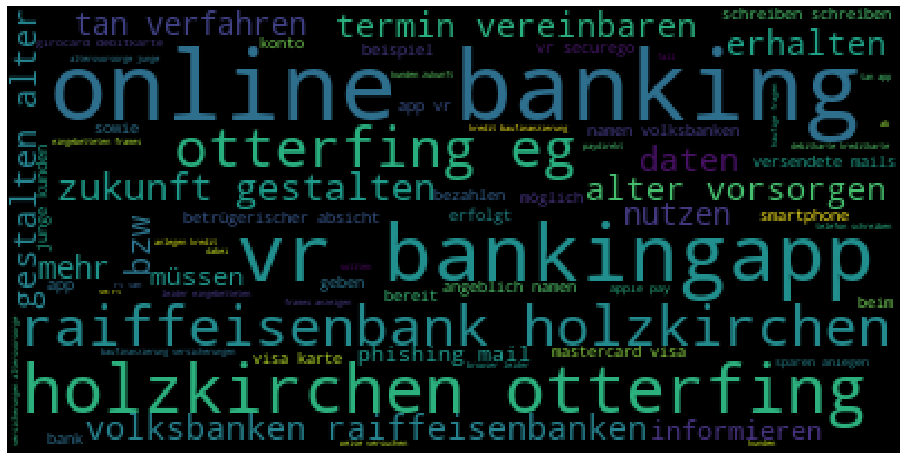

In [75]:
plt.figure(figsize = (16,10))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedText))
plt.imshow(wc)
plt.axis('off')

**Observations of Task 1 in Depth Method**

1. We can see that the bank is mainly focussing on online banking.
2. A lot of data is available pertaining to the bank is also seen. 
3. The bank also is focussing on conveying information about phishing mails. 
4. Tha bank's app is also given appropriate focus through its webpages. 
5. Also with the keywords "termin vereinbaren" it sends out message that the bank is acting in atmost professional manner and wants the customers to book an appointment . 
6. Also appropriate information is been given establishing its relationship with Volksbank. 


**Recommendation**
1. Giving focus much on the internet/online banking part, I would recommend the bank to also provide information on how to stay secure so that fraudulent activities can be prevented. 
2. I would also suggest the bank to give an easy access for old age people and encourage them to empower themselves by using online banking. 
3. I would further suggest that the bank should restrict displaying their information and branch name in home pages and few important pages and not in most of the pages. This is with respect to the information not in header or footer but in the content of the page. This would minimise the text content but give distinctiveness to the web pages. 

In [88]:
try:
    # Train doc2vec model
    print("Training Doc2Vec model....")
    doc2vec_model = models.Doc2Vec(size=300, window=5, min_count=10, workers=200,alpha=0.025, min_alpha=0.025,epochs=20)

    tag_data_total =  [models.doc2vec.TaggedDocument(d, [i]) for i, d in enumerate(scrapedText)]


    doc2vec_model.build_vocab(tag_data_total)
    doc2vec_model.train(tag_data_total,total_examples=len(tag_data_total), epochs=20)
    textVect_total = doc2vec_model.docvecs.doctag_syn0
    print("Model Completed training!")

except Exception as e:
    print(e)

Training Doc2Vec model....
Model Completed training!


## Task 2

### K- Means clustering

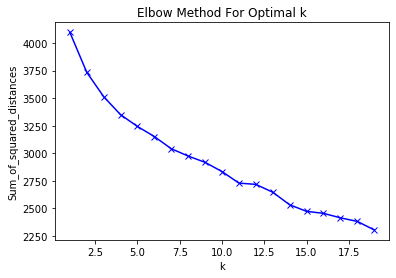

In [89]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(textVect_total)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [96]:
kmeans = KMeans(n_clusters=5, max_iter=500, algorithm = 'auto', init='k-means++')
kmeans = kmeans.fit(textVect_total)
kmeansLabels = kmeans.labels_.tolist()

**Evaluation using Silhouette score**

In [97]:
metrics.silhouette_score(textVect_total, labels=kmeans.predict(textVect_total))


0.10341858

**Visualization** - of Kmeans clustering

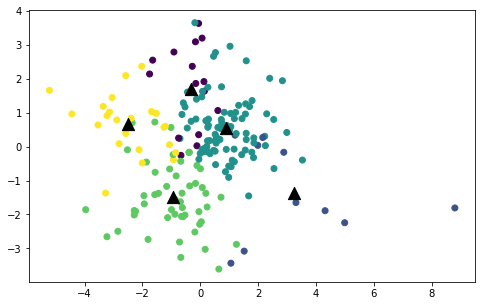

In [98]:
pca = PCA(n_components=2).fit(textVect_total)
datapoint = pca.transform(textVect_total)

plt.figure(figsize=(8,5))
label_colour = ["#FFFF00", "#008000", "#0000FF", "#800080","#AACCFF","#512956","#321456","#BBAACC"]
color = [label_colour[i] for i in kmeansLabels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c=kmeans.predict(textVect_total))
centroids = kmeans.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

**Visualization** - using TSNE plots

**2D plot**

In [99]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(textVect_total)


corpusDepthDf = pd.DataFrame()
corpusDepthDf['cluster'] = kmeansLabels
corpusDepthDf['2d-one'] = tsne_results[:,0]
corpusDepthDf['2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 1.945276
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.521309
[t-SNE] KL divergence after 300 iterations: 1.166608


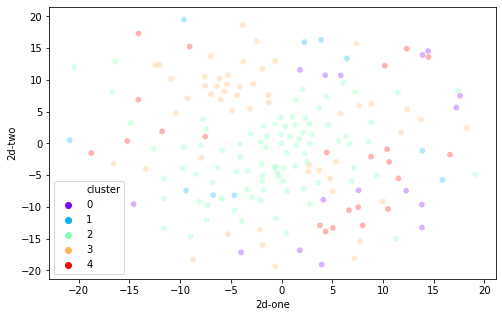

In [100]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="2d-one", y="2d-two",hue="cluster",palette='rainbow',data=corpusDepthDf,legend="full",alpha=0.3)

**3D plot**

In [101]:
tsne3d = TSNE(n_components=3, random_state=0)
tsne_results_3d = tsne3d.fit_transform(textVect_total)

corpusDepthDf_3d = pd.DataFrame()
corpusDepthDf_3d['text'] = scrapedText
corpusDepthDf_3d['cluster'] = kmeansLabels
corpusDepthDf_3d['3d-one'] = tsne_results_3d[:,0]
corpusDepthDf_3d['3d-one'] = tsne_results_3d[:,1]
corpusDepthDf_3d['3d-three'] = tsne_results_3d[:,2]


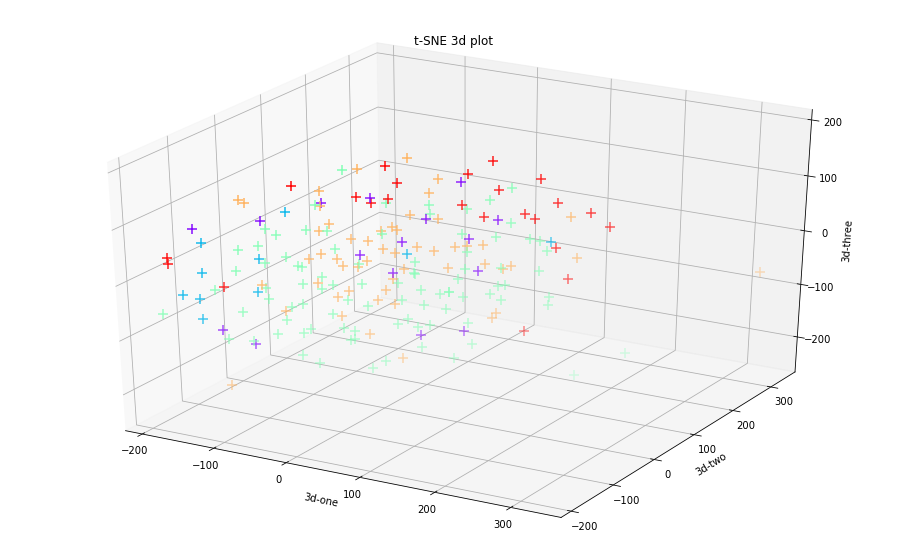

In [102]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(corpusDepthDf_3d['3d-one'], corpusDepthDf_3d['3d-one'], corpusDepthDf_3d['3d-three'], c= corpusDepthDf_3d['cluster'],cmap='rainbow', s = 100, marker='+')
ax.set_xlabel('3d-one')
ax.set_ylabel('3d-two')
ax.set_zlabel('3d-three')
plt.title("t-SNE 3d plot")
plt.axis('tight')
plt.show()

**Plotting word cloud for each cluster**

Totally there are 5 clusters, so a word cloud for each cluster to analyse what type of data/pattern lies in each cloud

In [103]:
scrapedText_0 = corpusDepthDf_3d.loc[corpusDepthDf_3d['cluster'] == 0].text.values
scrapedText_1 = corpusDepthDf_3d.loc[corpusDepthDf_3d['cluster'] == 1].text.values
scrapedText_2 = corpusDepthDf_3d.loc[corpusDepthDf_3d['cluster'] == 2].text.values
scrapedText_3 = corpusDepthDf_3d.loc[corpusDepthDf_3d['cluster'] == 3].text.values
scrapedText_4 = corpusDepthDf_3d.loc[corpusDepthDf_3d['cluster'] == 4].text.values

**Wordcloud for cluster 0**

(-0.5, 399.5, 199.5, -0.5)

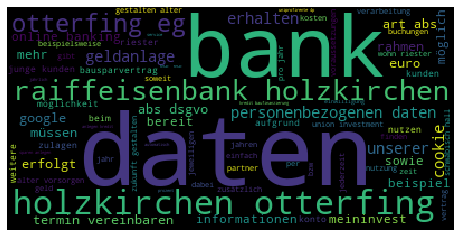

In [104]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedText_0))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 1**

(-0.5, 399.5, 199.5, -0.5)

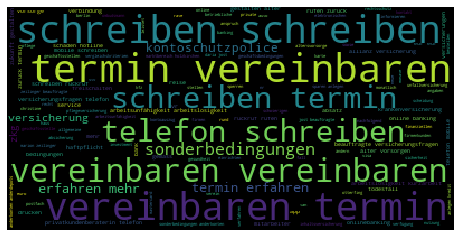

In [105]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedText_1))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 2**

(-0.5, 399.5, 199.5, -0.5)

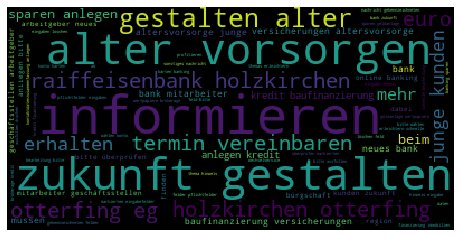

In [106]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedText_2))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 3**

(-0.5, 399.5, 199.5, -0.5)

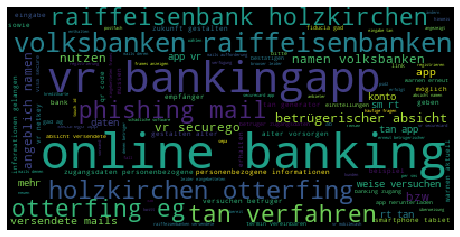

In [107]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedText_3))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 4**

(-0.5, 399.5, 199.5, -0.5)

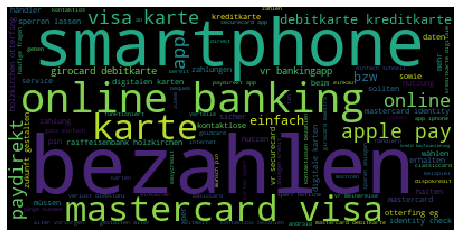

In [108]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedText_4))
plt.imshow(wc)
plt.axis('off')

**Observations from clustering approach for kmeans cluster for documents which was obtained using Depth method**

So based on the approach followed there were 5 clusters which were produced with each one having a seperate focus. 
1. Cluster 0 majorly focussed on the bank's data.  
2. Cluster 1 had its attention towards the appointments and writing the bank for appointments.
3. Cluster 2 focussed on taking precautions and shaping up the bank's future.  
4. Cluster 3 paid attention towards banking through app, online banking. 
5. Cluster 4 dealt with online banking, smartphones and payments through cards. 

We observe that there is mild similarity in cluster 3 and cluster 4. This is also attributed to the **k-value** we chose after the elbow method. The k-value chosen was with a heuristic. Whereas a lesser k-value would result in combination of one or more of these clusters providing us a well seperated cluster thus reducing the inter cluster dissimilarity. 

The cluster correlation can also be found through the 3D TSNE plots. We see that there are certain overlaps in colour region being found. So this points to the observation made using the wordclouds for each seperate cluster


### HAC - with euclidean distance

To find the optimal clusters, we use the dendogram approach to select the n_cluster value. 

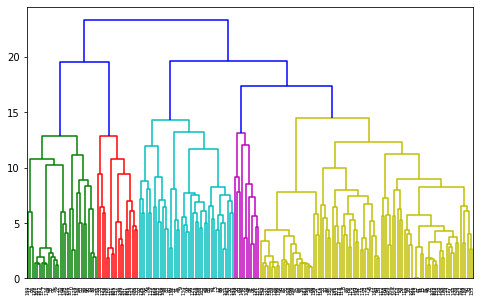

In [109]:
Z = hierarchy.linkage(textVect_total, 'ward')
plt.figure(figsize=(8,5))
dn = hierarchy.dendrogram(Z)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
hierarchy.set_link_color_palette(None)
plt.show()

**Observation**

We observe that there can be 6 distinct clusters possible

In [110]:

hac = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
hac = hac.fit(textVect_total)
hacLabels = hac.labels_.tolist()



**2D plot**

In [111]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(textVect_total)


corpusDepthDf_2d_hac = pd.DataFrame()
corpusDepthDf_2d_hac['text'] = scrapedText
corpusDepthDf_2d_hac['cluster'] = hacLabels
corpusDepthDf_2d_hac['2d-one'] = tsne_results[:,0]
corpusDepthDf_2d_hac['2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 1.945276
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.486404
[t-SNE] KL divergence after 300 iterations: 1.218429


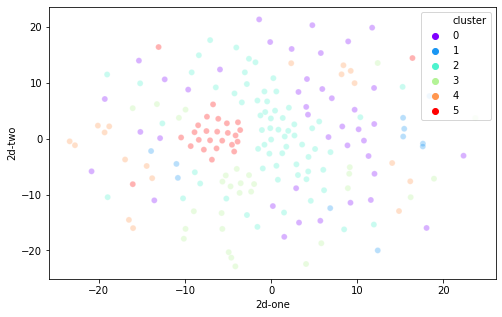

In [112]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="2d-one", y="2d-two",hue="cluster",palette='rainbow',data=corpusDepthDf_2d_hac,legend="full",alpha=0.3)

**3D plot**

In [113]:
tsne3d = TSNE(n_components=3, random_state=0)
tsne_results_3d = tsne3d.fit_transform(textVect_total)

corpusDepthDf_3d_hac = pd.DataFrame()
corpusDepthDf_3d_hac['text'] = scrapedText
corpusDepthDf_3d_hac['cluster'] = hacLabels
corpusDepthDf_3d_hac['3d-one'] = tsne_results_3d[:,0]
corpusDepthDf_3d_hac['3d-one'] = tsne_results_3d[:,1]
corpusDepthDf_3d_hac['3d-three'] = tsne_results_3d[:,2]

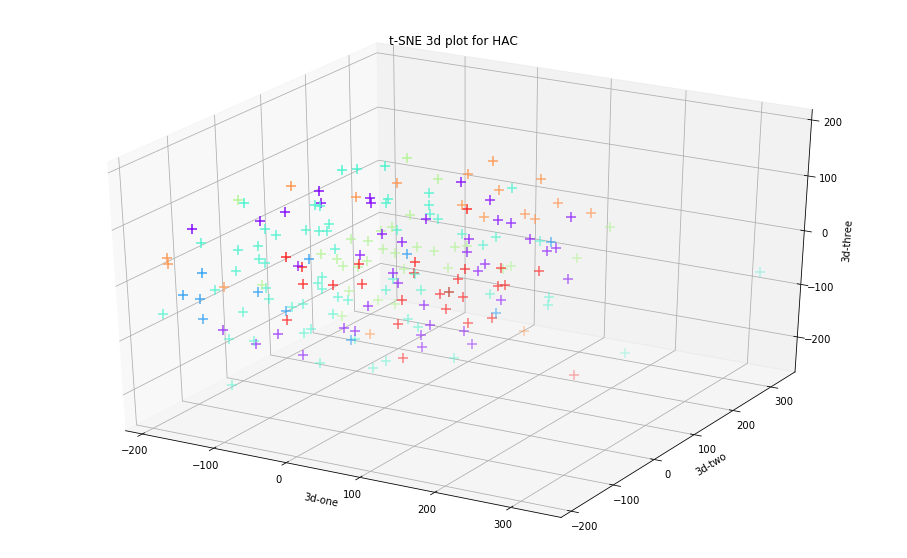

In [114]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(corpusDepthDf_3d_hac['3d-one'], corpusDepthDf_3d_hac['3d-one'], corpusDepthDf_3d_hac['3d-three'], c= corpusDepthDf_3d_hac['cluster'],cmap='rainbow', s = 100, marker='+')

ax.set_xlabel('3d-one')
ax.set_ylabel('3d-two')
ax.set_zlabel('3d-three')
plt.title("t-SNE 3d plot for HAC")
plt.axis('tight')
plt.show()

**Plotting word cloud for each cluster**

Totally there are 6 clusters, so a word cloud for each cluster to analyse what type of data/pattern lies in each cloud

In [115]:
scrapedTextHAC_0 = corpusDepthDf_3d_hac.loc[corpusDepthDf_3d_hac['cluster'] == 0].text.values
scrapedTextHAC_1 = corpusDepthDf_3d_hac.loc[corpusDepthDf_3d_hac['cluster'] == 1].text.values
scrapedTextHAC_2 = corpusDepthDf_3d_hac.loc[corpusDepthDf_3d_hac['cluster'] == 2].text.values
scrapedTextHAC_3 = corpusDepthDf_3d_hac.loc[corpusDepthDf_3d_hac['cluster'] == 3].text.values
scrapedTextHAC_4 = corpusDepthDf_3d_hac.loc[corpusDepthDf_3d_hac['cluster'] == 4].text.values
scrapedTextHAC_5 = corpusDepthDf_3d_hac.loc[corpusDepthDf_3d_hac['cluster'] == 5].text.values

**Wordcloud for cluster 0**

(-0.5, 399.5, 199.5, -0.5)

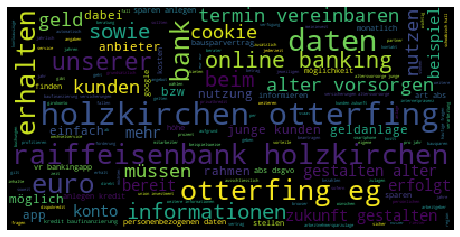

In [116]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextHAC_0))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 1**

(-0.5, 399.5, 199.5, -0.5)

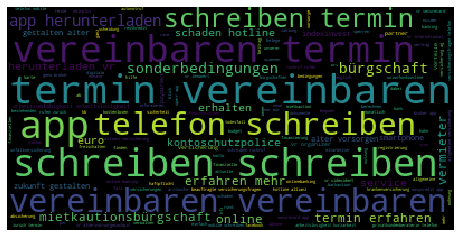

In [117]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextHAC_1))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 2**

(-0.5, 399.5, 199.5, -0.5)

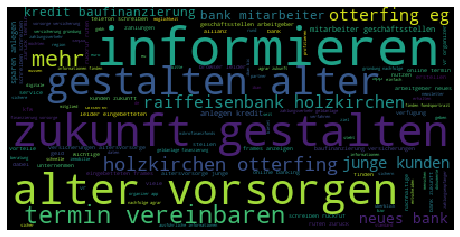

In [118]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextHAC_2))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 3**

(-0.5, 399.5, 199.5, -0.5)

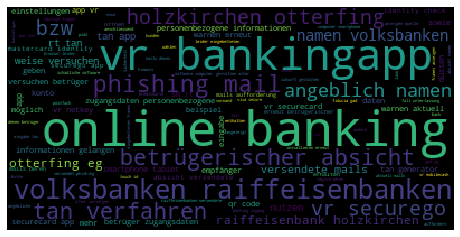

In [119]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextHAC_3))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 4**

(-0.5, 399.5, 199.5, -0.5)

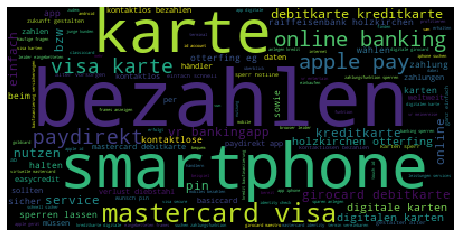

In [120]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextHAC_4))
plt.imshow(wc)
plt.axis('off')

**Wordcloud for cluster 5**

(-0.5, 399.5, 199.5, -0.5)

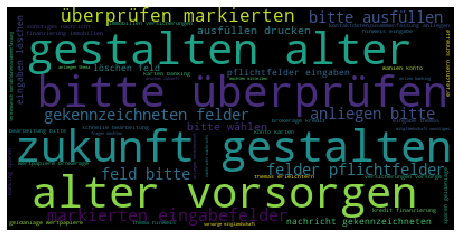

In [121]:
plt.figure(figsize = (8,5))
wc = WordCloud(background_color = "black")
wc.generate(' '.join(scrapedTextHAC_5))
plt.imshow(wc)
plt.axis('off')

**Observations from clustering approach for HAC for documents which was obtained using Depth method**

So based on the approach followed there were 5 clusters which were produced with each one having a seperate focus. 
1. Cluster 0 focussed on information, euros, booking an appointment.
2. Cluster 1 dealt with appointments and writing to bank for queries. 
3. Cluster 2 had its attention towards information and shaping up the future. 
4. Cluster 3 focussed on online banking and the banking app. 
5. Cluster 4 dealt with smartphone, payments and cards. 
6. Cluster 5 dealt with shaping up the bank's future and checking information. 


We observe that there is mild similarity in cluster 0 and cluster 1 and also in cluster 2 and cluster 6. This can further be analyzed in the 3D and 2D TSNE plots.  We see that there are certain overlaps in colour region being found. So this points to the observation made using the wordclouds for each separate cluster



## Conclusion from Depth method

Scraping for certain groups and observing like how we did in Breadth method is **required.**

For eg when we analyzed in breadth method we were able to see that distinct groups were observed. 

Wheareas in Depth method, some amount of similarity existed and this caused the inter cluster dissimilarity to reduce.

Few focal topics such as digital banking were seen across the clusters whereas there existed clusters which solely focused on a topic such as customer support. 

This is majorly attributed to the fact that everything these days can be done through digital/online banking and that's a recurring topic among few clusters. 